In [1]:
import csv
import numpy as np
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from os import getcwd

The data for this model is available at https://www.kaggle.com/datamunge/sign-language-mnist/home


In [2]:
def get_data(filename):
    with open(filename) as training_file:
        reader = csv.reader(training_file, delimiter=',')    
        imgs = []
        labels = []

        next(reader, None)
        
        for row in reader:
            label = row[0]
            data = row[1:]
            img = np.array(data).reshape((28, 28))

            imgs.append(img)
            labels.append(label)

        images = np.array(imgs).astype(float)
        labels = np.array(labels).astype(float)
            
      
    return images, labels

path_sign_mnist_train = f"{getcwd()}/../tmp2/sign_mnist_train.csv"
path_sign_mnist_test = f"{getcwd()}/../tmp2/sign_mnist_test.csv"
training_images, training_labels = get_data(path_sign_mnist_train)
testing_images, testing_labels = get_data(path_sign_mnist_test)

print(training_images.shape)
print(training_labels.shape)
print(testing_images.shape)
print(testing_labels.shape)


(27455, 28, 28)
(27455,)
(7172, 28, 28)
(7172,)


In [3]:
training_images = np.expand_dims(training_images, axis=3)
testing_images =  np.expand_dims(testing_images, axis=3)

# Image Data Generator and Image Augmentation
train_datagen = ImageDataGenerator(
    rescale=1. / 255,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
    )

validation_datagen = ImageDataGenerator(
    rescale=1 / 255)
    

print(training_images.shape)
print(testing_images.shape)    

(27455, 28, 28, 1)
(7172, 28, 28, 1)


In [4]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(32, (3,3), activation='relu', input_shape=(28, 28, 1)),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(32, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dense(26, activation='softmax')
])
 
model.compile(optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy'])

train_gen = train_datagen.flow(
    training_images,
    training_labels,
    batch_size=64
)

val_gen = validation_datagen.flow(
    testing_images,
    testing_labels,
    batch_size=64
)

history = model.fit_generator(train_gen,
    epochs=12,
    validation_data=val_gen
                             )
model.evaluate(testing_images, testing_labels, verbose=0)

Epoch 1/12
429/429 [==============================] - 38s 89ms/step - loss: 2.8150 - accuracy: 0.1508 - val_loss: 2.0398 - val_accuracy: 0.3571
Epoch 2/12
429/429 [==============================] - 34s 79ms/step - loss: 2.1150 - accuracy: 0.3298 - val_loss: 1.4222 - val_accuracy: 0.5007
Epoch 3/12
429/429 [==============================] - 34s 80ms/step - loss: 1.7224 - accuracy: 0.4461 - val_loss: 1.1197 - val_accuracy: 0.6054
Epoch 4/12
429/429 [==============================] - 34s 79ms/step - loss: 1.4428 - accuracy: 0.5265 - val_loss: 0.8528 - val_accuracy: 0.6921
Epoch 5/12
429/429 [==============================] - 33s 78ms/step - loss: 1.2642 - accuracy: 0.5880 - val_loss: 0.7601 - val_accuracy: 0.7306
Epoch 6/12
429/429 [==============================] - 34s 79ms/step - loss: 1.1139 - accuracy: 0.6354 - val_loss: 0.6903 - val_accuracy: 0.7492
Epoch 7/12
429/429 [==============================] - 33s 78ms/step - loss: 1.0019 - accuracy: 0.6729 - val_loss: 0.6552 - val_accuracy:

[146.9664009975044, 0.66285557]

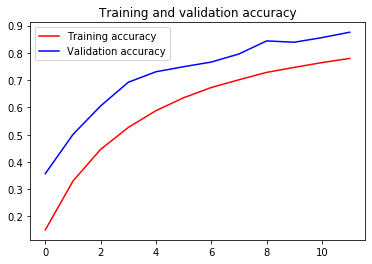

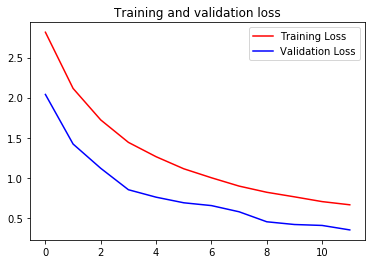

In [5]:
%matplotlib inline
import matplotlib.pyplot as plt
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'r', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()

plt.plot(epochs, loss, 'r', label='Training Loss')
plt.plot(epochs, val_loss, 'b', label='Validation Loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()